In [82]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

sys.path.insert(0, os.path.abspath('../src'))
from plot import plot_tracks

In [83]:
with open('../config.yaml') as file:
  params= yaml.safe_load(file)

preprocessed_data_folder = params['data_folder'] + "preprocessed/"

In [84]:
# get all folders in preprocessed data folder
import os
folders = [f for f in os.listdir(preprocessed_data_folder) if os.path.isdir(preprocessed_data_folder + f)]
print(folders)

folders = ['20231210', '20230628', '20231206', '20230524', '20230531']

['20230531', '20231210', '20230628', '20231206', '20230524']


In [85]:
df_tracks_all = pd.DataFrame()
df_robot_all = pd.DataFrame()
df_orientations_all = pd.DataFrame()

for run in folders:
    print(run)
    data_folder = preprocessed_data_folder + run + "/"

    df_tracks = pd.read_pickle(data_folder + 'pp_merged.pkl')
    print(f"   df_tracks: {df_tracks.shape}")
    df_tracks['obj.label_id_unique'] = df_tracks['obj.label_id_unique'].astype(int)
    df_tracks['obj.label_id_width_date']=df_tracks['obj.label_id_unique'].astype(str) + "_" + run
    df_tracks['date'] = run

    df_robot = pd.read_pickle(data_folder + 'pp_robot.pkl')
    df_robot['date'] = run
    print(f"   df_robot: {df_robot.shape}")

    df_orientations = pd.read_pickle(data_folder + 'pp_orientations.pkl')
    print(f"   df_orientations: {df_orientations.shape}")
    df_orientations['obj.label_id_unique'] = df_orientations['obj.label_id_unique'].astype(int)
    df_orientations['obj.label_id_width_date']=df_orientations['obj.label_id_unique'].astype(str) + "_" + run
    df_orientations['date'] = run
    
    df_tracks_all = pd.concat([df_tracks_all, df_tracks], ignore_index=True)
    df_robot_all = pd.concat([df_robot_all, df_robot], ignore_index=True)
    df_orientations_all = pd.concat([df_orientations_all, df_orientations], ignore_index=True)

print(" ")
print(f"df_tracks_all: {df_tracks_all.shape}")
print(f"df_robot_all: {df_robot_all.shape}")
print(f"df_orientations_all: {df_orientations_all.shape}")

20231210
   df_tracks: (13073, 51)
   df_robot: (3665, 25)
   df_orientations: (205, 33)
20230628
   df_tracks: (9871, 51)
   df_robot: (3603, 25)
   df_orientations: (296, 33)
20231206
   df_tracks: (21454, 51)
   df_robot: (2960, 25)
   df_orientations: (283, 33)
20230524
   df_tracks: (5920, 51)
   df_robot: (3374, 25)
   df_orientations: (139, 34)
20230531
   df_tracks: (2192, 51)
   df_robot: (4080, 25)
   df_orientations: (64, 33)
 
df_tracks_all: (52510, 52)
df_robot_all: (17682, 25)
df_orientations_all: (987, 35)


In [86]:
df_tracks_all.groupby(['obj.frame', 'date'])['obj.label_id_unique'].nunique().unstack()

date,20230524,20230531,20230628,20231206,20231210
obj.frame,,,,,
front,90.0,NaN,108.0,128.0,122.0
left,2.0,NaN,118.0,155.0,NaN
right,47.0,64.0,70.0,NaN,83.0


<Axes: ylabel='Frequency'>

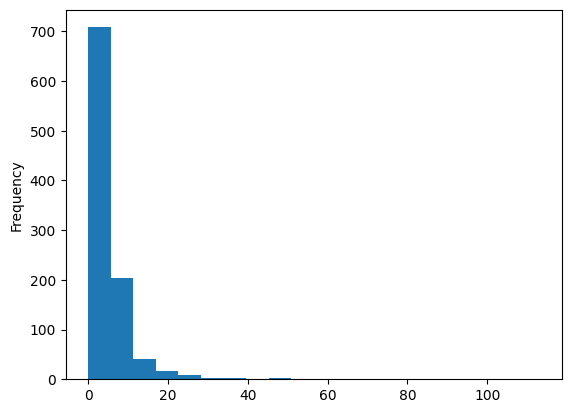

In [87]:
for index, row in df_orientations_all.iterrows():
    aux = df_tracks_all[df_tracks_all['obj.label_id_width_date'] == row['obj.label_id_width_date']]
    df_orientations_all.at[index, 'interaction_duration'] = (aux['gnss.timestamp'].max() - aux['gnss.timestamp'].min()).total_seconds()

df_orientations_all['interaction_duration'].plot.hist(bins=20)

In [88]:
pd.to_pickle(df_tracks_all, preprocessed_data_folder + 'pp_merged_all.pkl')
pd.to_pickle(df_robot_all, preprocessed_data_folder + 'pp_robot_all.pkl')
pd.to_pickle(df_orientations_all, preprocessed_data_folder + 'pp_orientations_all.pkl')

Text(0.5, 1.0, ' ')

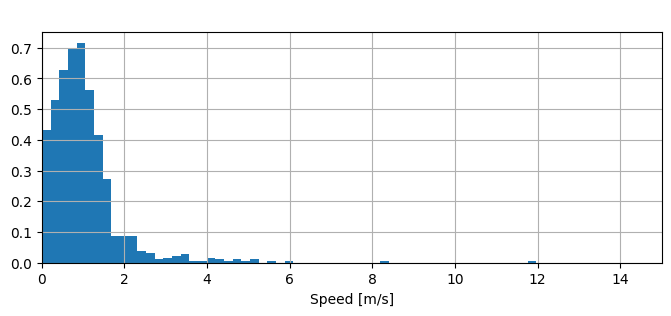

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))
df_orientations_all.hist(column='human_speed_est', density=True, bins=100, ax=ax)
ax.set_xlim(0, 15)
ax.set_xlabel('Speed [m/s]')
ax.set_title(' ')

array([<Axes: title={'center': 'human_corr_coeff'}>], dtype=object)

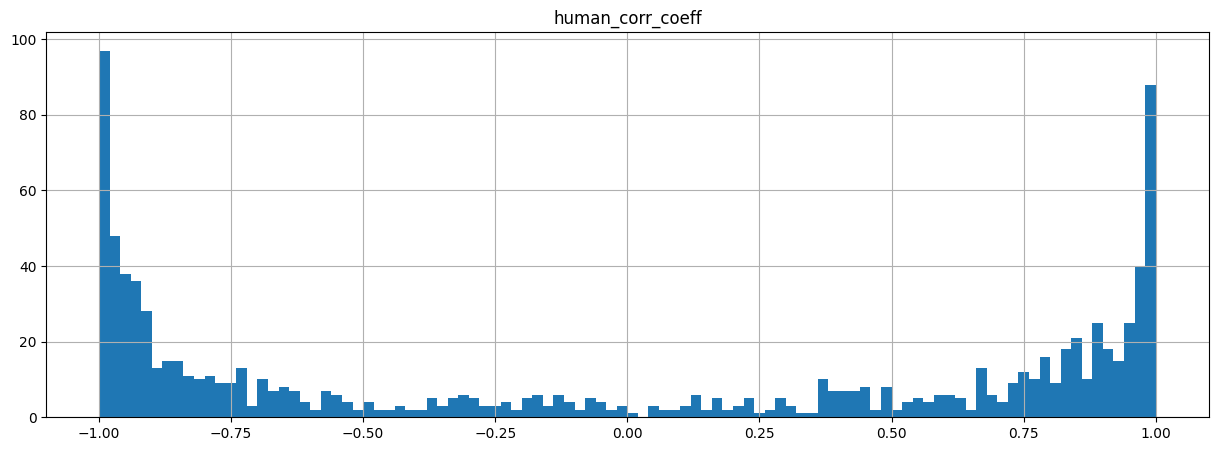

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
df_orientations_all.hist(column='human_corr_coeff', bins=100, ax=ax)

In [91]:
speed_threshold = 0.4
coeff_threshold = 0.5

In [92]:
print(df_orientations_all.shape[0])
print(df_orientations_all[df_orientations_all['human_speed_est'] < speed_threshold].shape[0])
print(df_orientations_all[abs(df_orientations_all['human_corr_coeff']) < coeff_threshold].shape[0])

987
163
187


$angle$=0.10
$angle$=1.31
$angle$=3.06


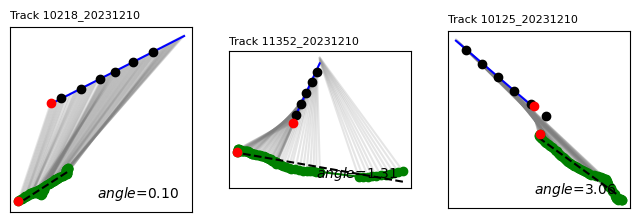

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(8,3))

ax=axs[0]
plot_tracks(ax,"10218_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)

ax=axs[1]
plot_tracks(ax,"11352_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)

ax=axs[2]
plot_tracks(ax, "10125_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)


$angle$=0.33
$angle$=0.37
$angle$=0.15


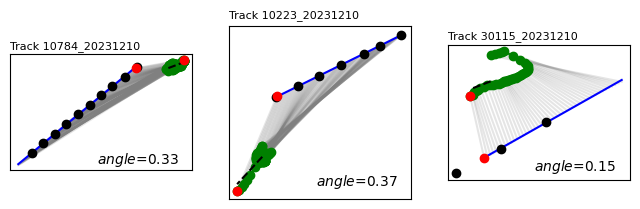

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(8,3))

ax=axs[0]
plot_tracks(ax,"10784_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)

ax=axs[1]
plot_tracks(ax,"10223_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)

ax=axs[2]
plot_tracks(ax, "30115_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)

Angle between robot and human ($lpha$) [rad]


Text(0, 0.5, 'Minimum distance ($d_{robot}$) [m]')

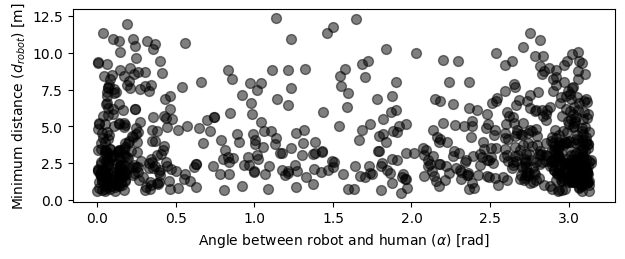

In [95]:
fig, ax = plt.subplots(figsize=(7,2.5))
#ax.axis('off')

# plot1 = plt.subplot2grid((2, 3), (0, 0)) 
# plot_tracks(plot1,"10218_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)
# 
# plot2 = plt.subplot2grid((2, 3), (0, 1)) 
# plot_tracks(plot2,"11352_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)
# 
# plot3 = plt.subplot2grid((2, 3), (0, 2)) 
# plot_tracks(plot3, "10125_20231210", False, df_tracks_all, df_robot_all, df_orientations_all)
# 
# plot4 = plt.subplot2grid((2, 3), (1, 0),colspan=3) 
# ax = plot4
#df_orientations_all[df_orientations_all['human_speed_est'] < speed_threshold]\
#    .plot(x='angle_robot_human', y='min_distance',
#          marker='o', ax=ax, kind='scatter', color='cyan', s=100)
#df_orientations_all[abs(df_orientations_all['human_corr_coeff']) < coeff_threshold]\
#    .plot(x='angle_robot_human', y='min_distance',
#          marker='X', ax=ax, kind='scatter', color='red', s=170)

aux = df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold]
#aux[aux['human_speed_est'] < speed_threshold].plot(x='angle_robot_human', y='min_distance', marker='o', ax=ax, kind='scatter', color='cyan', s=100)
aux.plot(x='angle_robot_human', y='min_distance', marker='o', ax=ax, kind='scatter', color='black', s=50, alpha=0.5)

#ax2 = ax.twinx()
#bins=np.linspace(0, np.pi, 20)
#aux.plot.hist(column='angle_robot_human', bins=bins, ax=ax2, color='red', alpha=0.5,  histtype='step', density=True)

print("Angle between robot and human ($\alpha$) [rad]")

ax.set_xlabel('Angle between robot and human ($α$) [rad]')
ax.set_ylabel('Minimum distance ($d_{robot}$) [m]')
#ax.legend([f'human speed < {speed_threshold} m/s'])

#relevant_ids = [10218, 11352, 10125]
#for id in relevant_ids:
#    ax.text(df_orientations[df_orientations.id==id].angle_robot_human.values[0],
#            df_orientations[df_orientations.id==id].min_distance.values[0],
#            id)
    

#df_orientations[df_orientations.id==10218].plot.text(x=0.5, y=0.5, s='10218')

In [96]:
aux.shape[0] #- df_orientations_all.shape[0]

786

In [97]:
print(f"$d_robot<0.3$ median = {aux[aux.angle_robot_human < 0.3].min_distance.median()}, mean = {aux[aux.angle_robot_human < 0.3].min_distance.mean()}")
print(f"$d_robot>2.8$ median = {aux[aux.angle_robot_human >2.8].min_distance.median()}, mean = {aux[aux.angle_robot_human >2.8].min_distance.mean()}")


$d_robot<0.3$ median = 2.8401232693772616, mean = 3.7598578168495407
$d_robot>2.8$ median = 2.8625892727875057, mean = 3.6297992048230876


/tmp/ipykernel_16129/309083243.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold].groupby('context').min_distance.plot(kind='kde', legend=True)


context
junction        Axes(0.125,0.11;0.775x0.77)
non-junction    Axes(0.125,0.11;0.775x0.77)
uncertain       Axes(0.125,0.11;0.775x0.77)
Name: min_distance, dtype: object

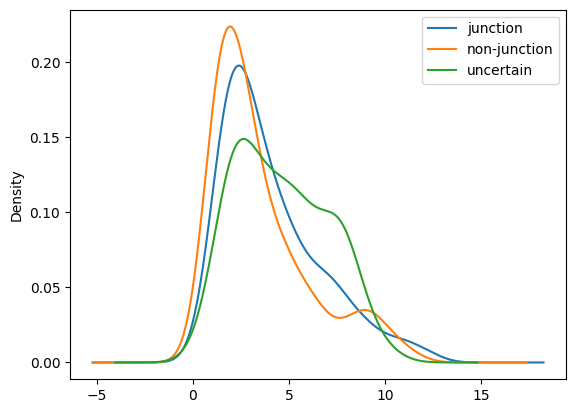

In [98]:
df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold].groupby('context').min_distance.plot(kind='kde', legend=True)

Text(0.5, 0, 'Angle between robot and human')

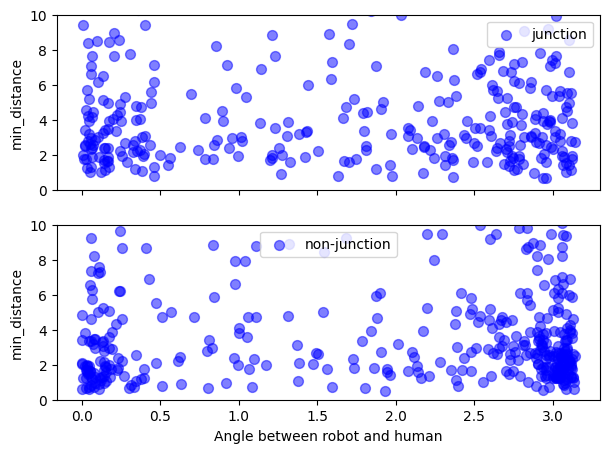

In [99]:
fig, axs = plt.subplots(2, 1, figsize=(7,5), sharex=True)
aux = df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold]

y_lim = 10

ax=axs[0]
aux[aux['context'] == 'junction'].plot(x='angle_robot_human', y='min_distance', marker='o', ax=ax, kind='scatter', color='blue', alpha=0.5, s=50)
ax.legend(['junction'])
ax.set_ylim(0,y_lim)

ax=axs[1]
aux[aux['context'] == 'non-junction'].plot(x='angle_robot_human', y='min_distance', marker='o', ax=ax, kind='scatter', color='blue', alpha=0.5, s=50)
ax.legend(['non-junction'])
ax.set_ylim(0,y_lim)

ax.set_xlabel('Angle between robot and human')

/tmp/ipykernel_16129/3455963806.py:2: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


Text(0.5, 1.0, 'Non-junction context')

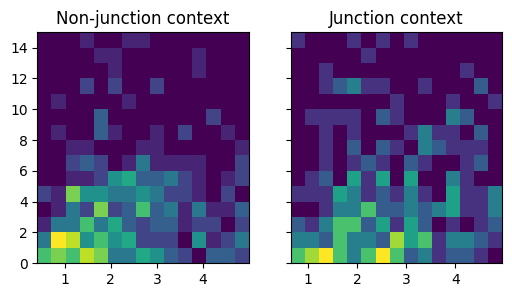

In [100]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

aux = df_orientations_all[
                          (df_orientations_all['interaction_duration'] <= 15) & 
                          (df_orientations_all['min_distance'] <= 5)]

ax=axs[1]
ax.hist2d(
    aux[aux['context'] == 'junction']['min_distance'], 
    aux[aux['context'] == 'junction']['interaction_duration'],
    bins=(15,15));
ax.set_title("Junction context")

ax=axs[0]
ax.hist2d(
    aux[aux['context'] == 'non-junction']['min_distance'], 
    aux[aux['context'] == 'non-junction']['interaction_duration'],
    bins=(15,15));
ax.set_title("Non-junction context")

/tmp/ipykernel_16129/2445675164.py:2: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


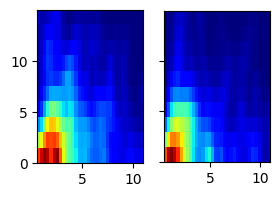

In [101]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter

def myplot(x, y, s, bins=10):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent


aux = df_orientations_all[
                          (df_orientations_all['interaction_duration'] <= 15) & 
                          (df_orientations_all['min_distance'] <= 11)]

fig, axs = plt.subplots(1, 2, figsize=(3,15), sharey=True)
sigma = 1

ax = axs[0]
x = aux[aux['context'] == 'junction']['min_distance']
y = aux[aux['context'] == 'junction']['interaction_duration']
img, extent = myplot(x, y, sigma, bins = (34, 10))
ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

ax = axs[1]
x = aux[aux['context'] == 'non-junction']['min_distance']
y = aux[aux['context'] == 'non-junction']['interaction_duration']
img, extent = myplot(x, y, sigma,  bins = (34, 10))
ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)


(0.0, 15.0)

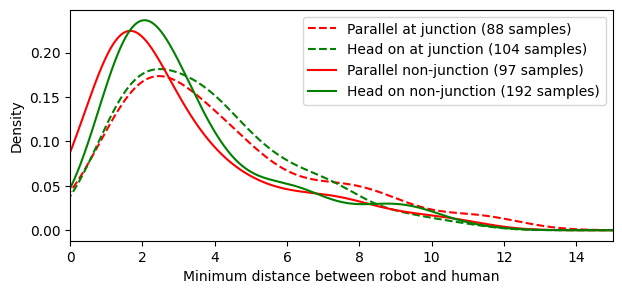

In [102]:
head_on = 2.7
parallel = 0.3

fig, ax = plt.subplots(figsize=(7,3), sharey=True)

aux = df_orientations_all.query('context == "junction" & angle_robot_human < @parallel')
aux['min_distance'].plot.kde(ax=ax, label=f'Parallel at junction ({aux.shape[0]} samples)', color='red', style='--')

aux = df_orientations_all.query('context == "junction" & angle_robot_human > @head_on')
aux['min_distance'].plot.kde(ax=ax, label=f'Head on at junction ({aux.shape[0]} samples)',color='green', style='--')

ax.set_xlabel('Minimum distance between robot and human')
ax.set_ylabel('Density')
ax.legend()

aux = df_orientations_all.query('context == "non-junction" & angle_robot_human < @parallel')
aux['min_distance'].plot.kde(ax=ax, label=f'Parallel non-junction ({aux.shape[0]} samples)',color='red')

aux = df_orientations_all.query('context == "non-junction" & angle_robot_human > @head_on')
aux['min_distance'].plot.kde(ax=ax, label=f'Head on non-junction ({aux.shape[0]} samples)',color='green',)

ax.set_xlabel('Minimum distance between robot and human')
ax.set_ylabel('Density')
ax.legend()
ax.set_xlim(0, 15)

In [107]:
aux = df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold]
aux.shape

(786, 36)

In [112]:
aux = df_orientations_all[(abs(df_orientations_all['human_corr_coeff']) > coeff_threshold)]
aux = aux[(aux['human_speed_est'] < 3 ) & (aux['robot_rotation'] < 0.5)]
aux.shape

(654, 36)

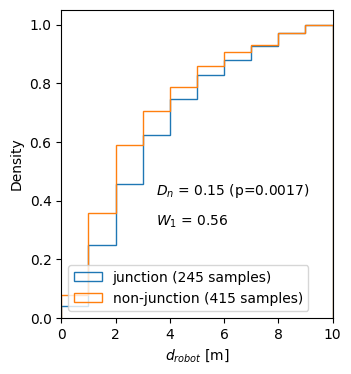

In [115]:
from scipy import stats

head_on = 2.7
parallel = 0.3

bins = list(np.arange(0, 10.5, 1))

fig, ax = plt.subplots(figsize=(3.5,4.0))

junction_diameter = 8

aux = df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold]
aux = aux.query('robot_crossing_dist_mean < @junction_diameter & human_crossing_dist_mean < @junction_diameter')
aux['min_distance'].plot.hist(ax=ax, label=f'junction ({aux.shape[0]} samples)',
                              cumulative=True, bins=bins, histtype='step', density=True )
samples_1=aux['min_distance']

ax.set_xlabel('Minimum distance between robot and human')
ax.set_ylabel('Density')
ax.legend()

aux = df_orientations_all[abs(df_orientations_all['human_corr_coeff']) > coeff_threshold]
aux = aux.query('robot_crossing_dist_mean >= @junction_diameter & human_crossing_dist_mean > @junction_diameter')
aux['min_distance'].plot.hist(ax=ax, label=f'non-junction ({aux.shape[0]} samples)',
                              cumulative=True, bins=bins, histtype='step', density=True )

samples_2=aux['min_distance']

ks = stats.ks_2samp(samples_1, samples_2, alternative='two-sided')
ws = stats.wasserstein_distance(samples_1, samples_2)
ax.text(0.35, 0.4, f"$D_n$ = {ks.statistic:.2f} (p={ks.pvalue:.4f})", transform=ax.transAxes)
ax.text(0.35, 0.3, f"$W_1$ = {ws:.2f}", transform=ax.transAxes)

ax.set_xlabel('$d_{robot}$ [m]');
ax.set_ylabel('Density')
ax.legend()
ax.set_xlim(0, 10);
#ax.grid(True)

In [104]:
from scipy import stats
ks = stats.ks_2samp(samples_1, samples_2, alternative='two-sided')
ks

KstestResult(statistic=0.1773160614220217, pvalue=5.117262861405535e-05, statistic_location=2.9665970119378953, statistic_sign=-1)

In [105]:
stats.wasserstein_distance(samples_1, samples_2)

0.6608013381530825

In [106]:
head_on = 2.7
parallel = 0.3

bins = list(np.arange(0, 10.5, 1))

for junction_diameter in range(4, 12):
    aux = df_orientations_all.query('robot_crossing_dist_min < @junction_diameter & human_crossing_dist_min < @junction_diameter')
    hist_1 = np.histogram(aux['min_distance'], bins=bins, density=True)
    aux = df_orientations_all.query('robot_crossing_dist_min >= @junction_diameter & human_crossing_dist_min > @junction_diameter')
    hist_2 = np.histogram(aux['min_distance'], bins=bins, density=True)
    print(f"{junction_diameter} {np.sum(np.abs(hist_1[0]-hist_2[0])):.2f}")

4 0.24
5 0.37
6 0.41
7 0.35
8 0.34
9 0.35
10 0.32
11 0.30
